<a href="https://colab.research.google.com/github/m1d0e1/HealthInsurance/blob/main/HealthInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('insurance.xlsx')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


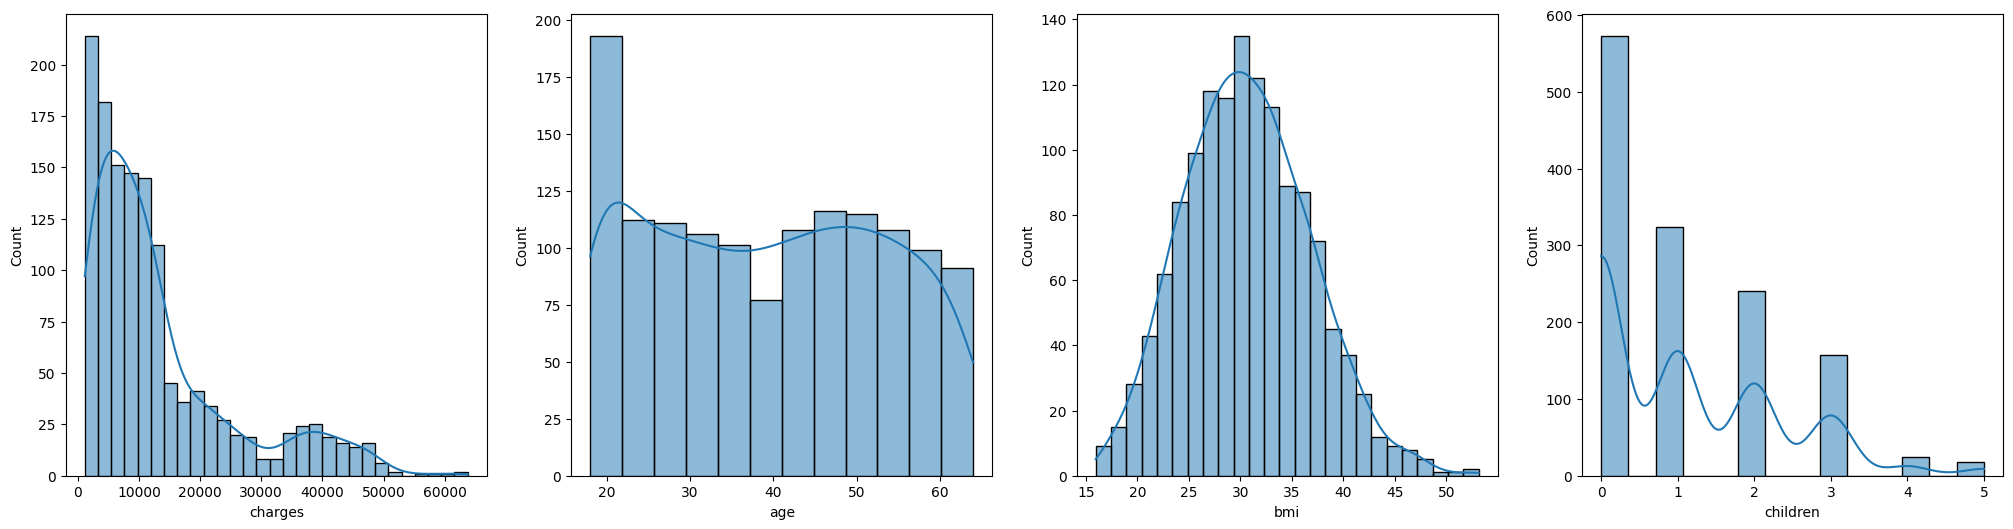

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(df['charges'], kde=True)
plt.subplot(1,4,2)
sns.histplot(df['age'], kde=True)
plt.subplot(1,4,3)
sns.histplot(df['bmi'], kde=True)
plt.subplot(1,4,4)
sns.histplot(df['children'], kde=True)
plt.show()

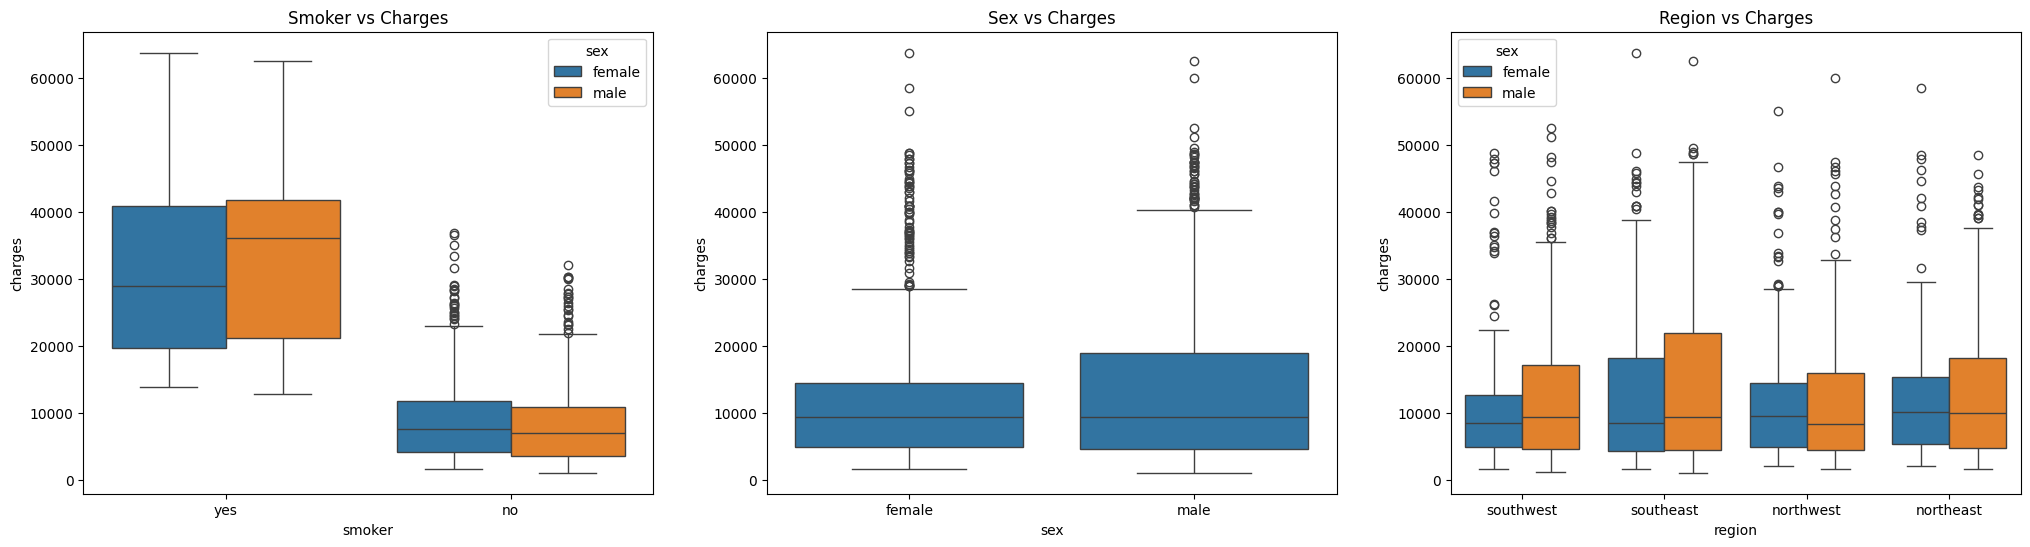

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
sns.boxplot(data=df, x='smoker', y='charges', hue='sex')
plt.title('Smoker vs Charges')
plt.subplot(1,3,2)
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Sex vs Charges')
plt.subplot(1,3,3)
sns.boxplot(data=df, x='region', y='charges', hue='sex')
plt.title('Region vs Charges')
plt.show()

In [ ]:
from re import T
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df = df.replace(True, 1)
df = df.replace(False, 0)
df.head()

<ipython-input-9-f87865ba25f9>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(False, 0)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


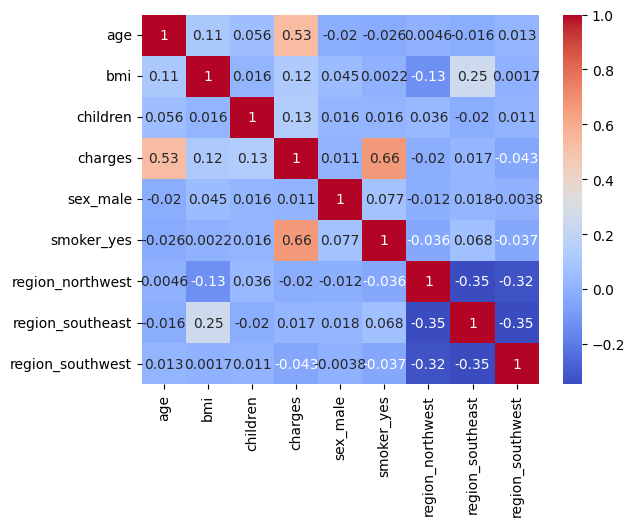

In [ ]:
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()

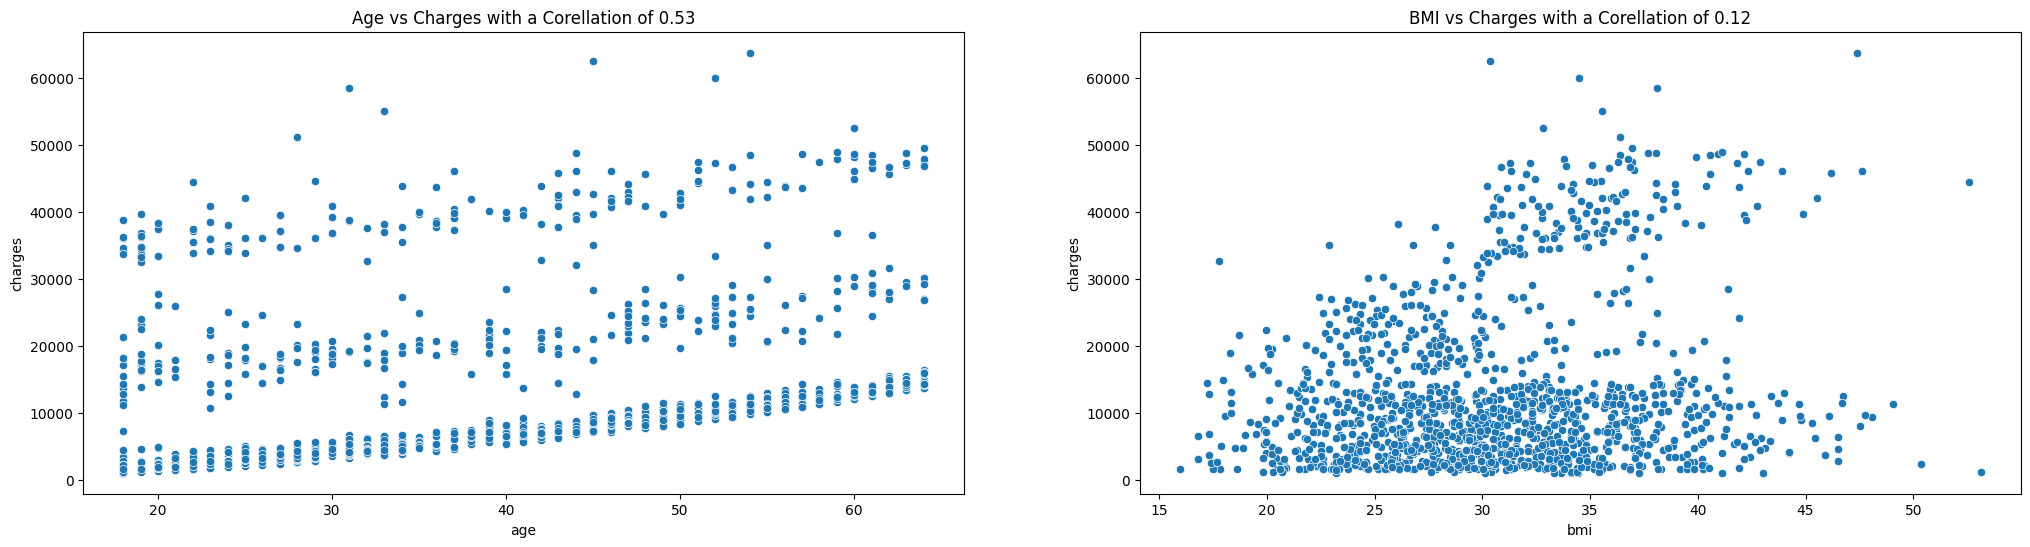

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='age', y='charges')
correlation1 = df['age'].corr(df['charges'], method='spearman')
plt.title(f'Age vs Charges with a Corellation of {correlation1:.2f}')
plt.subplot(1,2,2)
correlation2 = df['bmi'].corr(df['charges'], method='spearman')
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title(f'BMI vs Charges with a Corellation of {correlation2:.2f}')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Features and target
X = df.drop(columns=['charges'])
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }

# Display results
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R2
Linear Regression,4177.045561,3.547802e+07,0.806929
Decision Tree,2804.811633,3.495303e+07,0.809786
Random Forest,2663.328798,2.237258e+07,0.878249
Gradient Boosting,2517.467831,1.821824e+07,0.900856


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
MAE: 2580.5478938736396
MSE: 20155009.09884736
R2: 0.8903164953819459


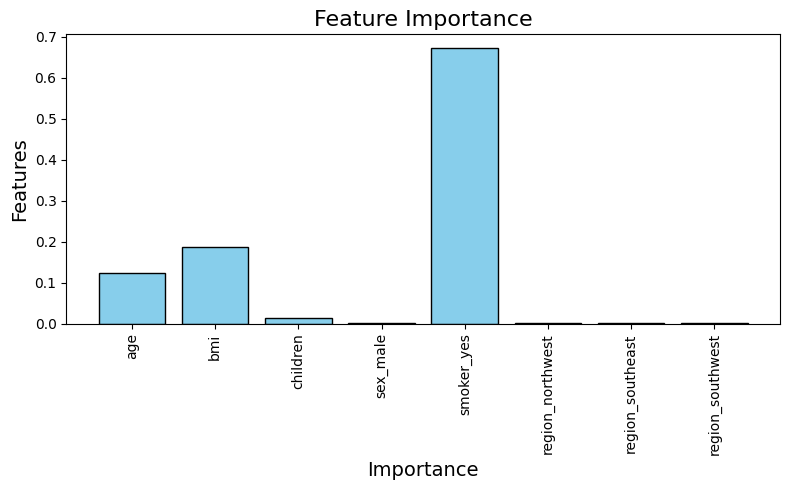

In [ ]:
chosed_model = GradientBoostingRegressor(random_state=42)
chosed_model.fit(X_train, y_train)
importances = chosed_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.bar(feature_names, importances, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_r2_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

mean_r2 = np.mean(cv_r2_scores)
std_r2 = np.std(cv_r2_scores)

print(f"Cross-Validation R^2 Scores: {cv_r2_scores}")
print(f"Mean R^2: {mean_r2:.4f}")
print(f"Standard Deviation of R^2: {std_r2:.4f}")

Cross-Validation R^2 Scores: [0.871218   0.79131403 0.88310632 0.83506017 0.86206952]
Mean R^2: 0.8486
Standard Deviation of R^2: 0.0327
